In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [4]:
data=pd.read_csv('C://Users//Faith//Desktop//DATASETS//iris.csv')

In [5]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.shape

(150, 6)

In [7]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Standardization

In [12]:
from sklearn.preprocessing import StandardScaler

In [14]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [17]:
X=data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

In [19]:
X.head(1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2


In [18]:
ss=StandardScaler()
ss.fit(X)
scaled_data=ss.transform(X)

# PCA

In [22]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)


In [23]:
pca.fit(scaled_data)
lol=pca.transform(scaled_data)

In [30]:
pca.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577]])

In [33]:
explained_variance=pca.explained_variance_ratio_
print(explained_variance)

[0.72770452 0.23030523]


In [34]:
lol

array([[-2.26454173e+00,  5.05703903e-01],
       [-2.08642550e+00, -6.55404729e-01],
       [-2.36795045e+00, -3.18477311e-01],
       [-2.30419716e+00, -5.75367713e-01],
       [-2.38877749e+00,  6.74767397e-01],
       [-2.07053681e+00,  1.51854856e+00],
       [-2.44571134e+00,  7.45626750e-02],
       [-2.23384186e+00,  2.47613932e-01],
       [-2.34195768e+00, -1.09514636e+00],
       [-2.18867576e+00, -4.48629048e-01],
       [-2.16348656e+00,  1.07059558e+00],
       [-2.32737775e+00,  1.58587455e-01],
       [-2.22408272e+00, -7.09118158e-01],
       [-2.63971626e+00, -9.38281982e-01],
       [-2.19229151e+00,  1.88997851e+00],
       [-2.25146521e+00,  2.72237108e+00],
       [-2.20275048e+00,  1.51375028e+00],
       [-2.19017916e+00,  5.14304308e-01],
       [-1.89407429e+00,  1.43111071e+00],
       [-2.33994907e+00,  1.15803343e+00],
       [-1.91455639e+00,  4.30465163e-01],
       [-2.20464540e+00,  9.52457317e-01],
       [-2.77416979e+00,  4.89517027e-01],
       [-1.

In [32]:
lol.shape

(150, 2)

# Visualization

In [11]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [28]:
target=data['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})


In [35]:
PCA=pd.DataFrame(data=lol, columns=['PCA_1','PCA_2'])

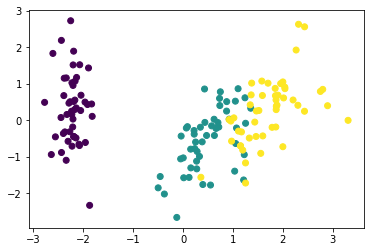

In [52]:
plt.scatter(data=PCA, x='PCA_1',y='PCA_2',c=target)
plt.figure(figsize=(8,8))


# Interpreting the components

In [54]:
col=X.columns

In [55]:
df=pd.DataFrame(pca.components_, columns=col)

In [56]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.522372,-0.263355,0.581254,0.565611
1,0.372318,0.925556,0.021095,0.065416


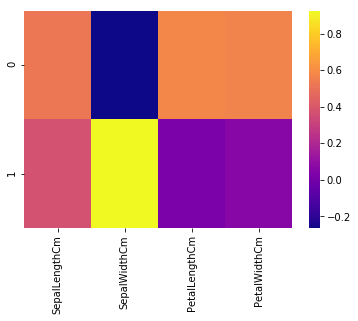

In [57]:
sns.heatmap(df,cmap='plasma')

# K-Means

In [59]:
from sklearn.cluster import KMeans

To determine the number of clusters,we need to find the value of k

In [63]:
ss=[]
K=range(1,10)
for k in K:
    km=KMeans(n_clusters=k)
    km.fit(PCA)
    ss.append(km.inertia_)

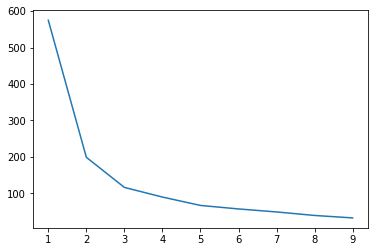

In [64]:
plt.plot(K,ss)

Therefore our number of clusters would be three, since there is a second elbow(sudden change)at three at which the sum of squared errot decresed abruptly

In [65]:
km=KMeans(n_clusters=3)
km.fit(PCA)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [66]:
km.cluster_centers_

array([[ 1.72236912,  0.59990509],
       [-2.22019328,  0.29222482],
       [ 0.56713803, -0.8076751 ]])

In [70]:
PCA['Cluster']=km.labels_

In [71]:
PCA.head(1)

,PCA_1,PCA_2,Target,Cluster
0,-2.264542,0.505704,1,1


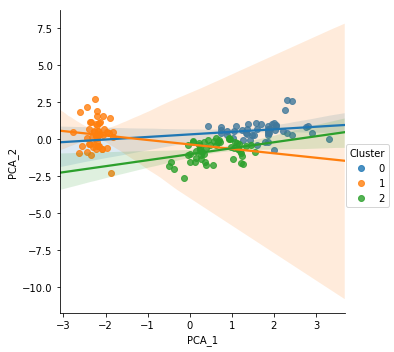

In [76]:
sns.lmplot('PCA_1','PCA_2', data=PCA,hue='Cluster',)